In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
salary=pd.read_csv("Salary_Data.csv")
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [2]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


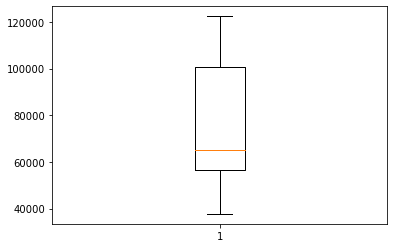

In [3]:
plt.boxplot(salary.Salary)
salary.describe()

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

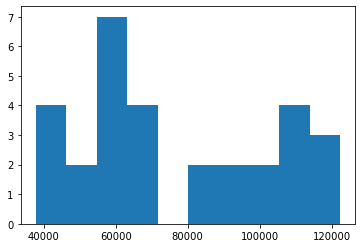

In [4]:
plt.hist(salary.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x2190cccb400>,
 'caps': [<matplotlib.lines.Line2D at 0x2190d67d100>,
 'boxes': [<matplotlib.lines.Line2D at 0x2190cccb3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2190d67d6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2190ccb6490>],
 'means': []}

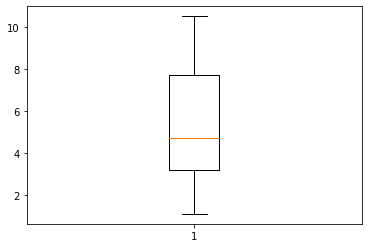

In [6]:
plt.boxplot(salary.YearsExperience)


(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

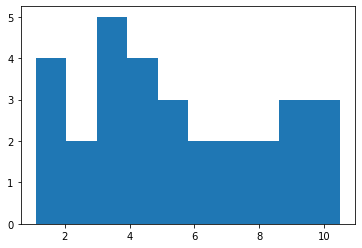

In [7]:
plt.hist(salary.YearsExperience)

Text(0, 0.5, 'YearsExperience')

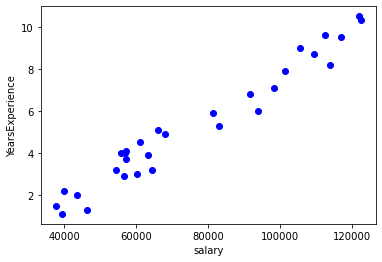

In [8]:
plt.plot(salary.Salary,salary.YearsExperience,'bo')
plt.xlabel('salary')
plt.ylabel('YearsExperience')

In [9]:
salary.YearsExperience.corr(salary.Salary)

0.9782416184887599

In [13]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=salary).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           1.14e-20
Time:                        12:30:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pred = model.predict(salary.iloc[:,0])
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [22]:
model.resid
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [25]:
pred = model.predict(salary.iloc[:,0])
pred
pd.set_option("display.max_rows",None)
pred
rmse_lin =  np.sqrt(np.mean((np.array(salary['Salary'])-np.array(pred))**2))
rmse_lin

5592.043608760662

Text(0, 0.5, 'SALARY')

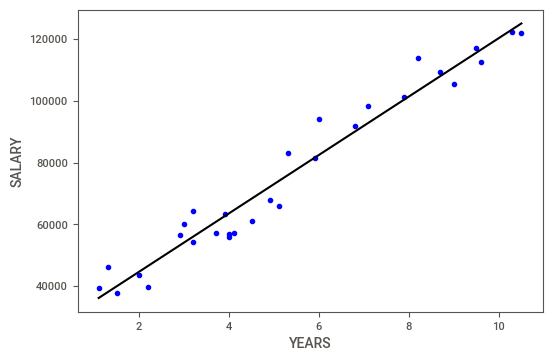

In [26]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'],color='blue')
plt.plot(salary['YearsExperience'],pred,color="black")
plt.xlabel("YEARS")
plt.ylabel("SALARY")

In [51]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=salary).fit()
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [48]:
model2.resid 
model2.resid_pearson 

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [49]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           3.25e-13
Time:                        13:29:44   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred2=model2.predict(pd.DataFrame(salary['YearsExperience']))
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [33]:
rmse_log = np.sqrt(np.mean((np.array(salary['Salary'])-np.array(pred2))**2))
rmse_log 

10302.893706228308

In [34]:
pred2.corr(salary.Salary)

0.9240610817882637

Text(0, 0.5, 'SALARY')

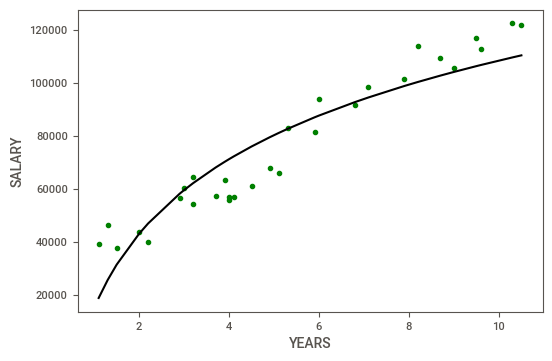

In [36]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'],color='green')
plt.plot(salary['YearsExperience'],pred2,color="black")
plt.xlabel("YEARS")
plt.ylabel("SALARY")

In [37]:
model3=smf.ols('np.log(Salary)~YearsExperience',data=salary).fit()
model3.params


Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [38]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           7.03e-18
Time:                        13:05:00   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
pred_log = model3.predict(pd.DataFrame(salary['YearsExperience']))
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [57]:
pred3=np.exp(pred_log)
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [58]:
model3.resid
model3.resid_pearson

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

In [70]:
rmse_Exp = np.sqrt(np.mean((np.array(salary['Salary'])-np.array(pred3))**2))
rmse_Exp 

7213.235076620129

In [60]:
pred3.corr(salary.Salary)

0.9660469705377085

Text(0, 0.5, 'SALARY')

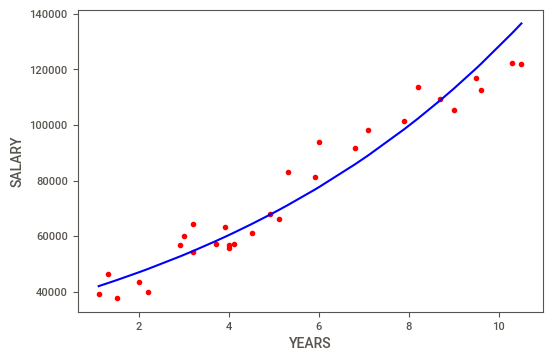

In [61]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'],color='red')
plt.plot(salary['YearsExperience'],pred3,color="blue")
plt.xlabel("YEARS")
plt.ylabel("SALARY")

In [39]:
salary['YearsExperience_sq']=salary.YearsExperience*salary.YearsExperience
salary

,YearsExperience,Salary,YearsExperience_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [54]:
model4=smf.ols('np.log(Salary)~YearsExperience+YearsExperience_sq',data=salary).fit()
model4.params


Intercept             10.336852
YearsExperience        0.202382
YearsExperience_sq    -0.006614
dtype: float64

In [55]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           3.95e-18
Time:                        13:32:09   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
pred4=model4.predict(salary)
pred4=np.exp(pred4)
pred4

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [71]:
rmse_quad=np.sqrt(np.mean((np.array(salary['Salary'])-np.array(pred4))**2))
rmse_quad

5391.081582693624

Text(0, 0.5, 'SALARY')

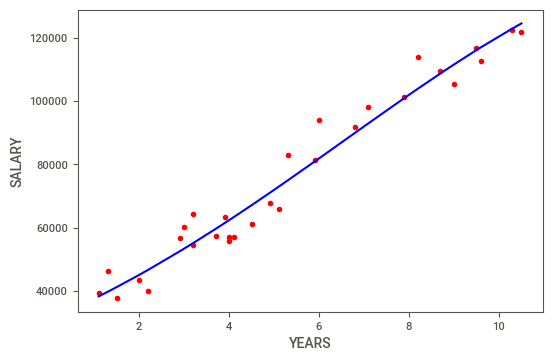

In [67]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'],color='red')
plt.plot(salary['YearsExperience'],pred4,color="blue")
plt.xlabel("YEARS")
plt.ylabel("SALARY")

In [74]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_Exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_Exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,5592.043609,0.956957
1,rmse_log,10302.893706,0.853889
2,rmse_Exp,7213.235077,0.931967
3,rmse_quad,5391.081583,0.948611


In [78]:
plt.style.use("dark_background")

(array([6., 2., 4., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.37484017, -1.03957794, -0.70431572, -0.36905349, -0.03379126,
         0.30147096,  0.63673319,  0.97199542,  1.30725764,  1.64251987,
         1.9777821 ]),
 <a list of 10 Patch objects>)

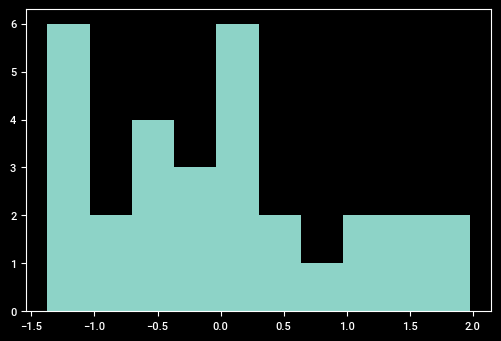

In [81]:
plt.hist(model.resid_pearson)


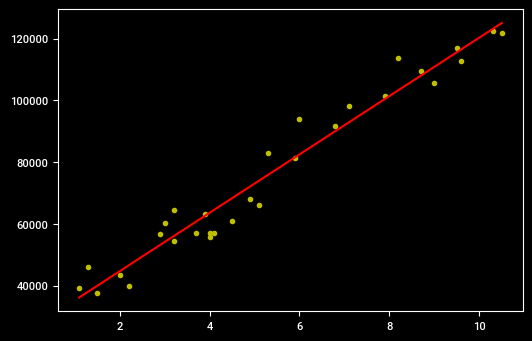

In [83]:
plt.scatter(salary.YearsExperience,salary.Salary,c='y')
plt.plot(salary.YearsExperience,pred,"r")

In [84]:
import pandas_profiling as pp
EDA_report=pp.ProfileReport(salary)
EDA_report.to_file(output_file='report1.html')

In [85]:
import sweetviz as sv
sweet_report = sv.analyze(salary)
sweet_report.show_html('salary_hike.html')


Report salary_hike.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
